 Set up the Kaggle API

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Downloading dataset from kaggle using API

In [2]:
!kaggle datasets download -d praveen2084/leather-defect-classification

 59% 18.0M/30.7M [00:00<00:00, 26.5MB/s]
100% 30.7M/30.7M [00:00<00:00, 39.5MB/s]


Extracting the zip files of downloaded data

In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/leather-defect-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Importing libraries for data preprocessing

In [4]:
import os
import numpy as np
import cv2

Combining 5 different classes of defects as we have to do binary classification .

In [5]:
ds=[]
categories=["Folding marks","Grain off","Growth marks","loose grains","pinhole"]
c=0
for category in categories:
    path=os.path.join('Leather Defect Classification',category)
    label=0
    for file in os.listdir(path):
          img_path=os.path.join(path,file)
          img=cv2.imread(img_path,1)
          img=cv2.resize(img,(224,224))
          ds.append([img,label])


In [6]:
len(ds)

3000

Shuffling of elements in ds to avoid biasness

In [7]:
import random
random.shuffle(ds)

In [8]:
ds=ds[:800]

Now we will pick the non defective images

In [9]:


path2=os.path.join('Leather Defect Classification','non defective')
for file in os.listdir(path2):
      img_path=os.path.join(path2,file)
      img=cv2.imread(img_path,1)
      img=cv2.resize(img,(224,224))
      ds.append([img,1])

In [10]:
len(ds)

1400

In [11]:
random.shuffle(ds)

Dividing the dataset into input and output

In [12]:
X=[]
Y=[]
for i in ds:
    X.append(i[0])
    Y.append(i[1])

In [13]:
import numpy as np
X=np.array(X)
Y=np.array(Y)

Normalisation of pixel values of images

In [14]:
X=X/255

Splitiing the dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

Importing necessary deep learning libraries

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Loading of GoogleNet

In [18]:
model = keras.applications.InceptionV3(weights='imagenet', include_top=False)



87910968/87910968 [==============================] - 1s 0us/step


Here we are checking the architecture of GoogleNet

In [ ]:
model.summary()

Freeze the pre-trained layers

In [20]:
for layer in model.layers:
    layer.trainable = False



Adding our own layers here

In [21]:
x = model.output

x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions =Dense(1, activation='sigmoid')(x)



Created a new model

In [22]:
new_model = keras.models.Model(inputs=model.input, outputs=predictions)

Compilation and fitting of model on our data

In [23]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=new_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
35/35 [==============================] - 19s 238ms/step - loss: 0.3246 - accuracy: 0.8491 - val_loss: 0.1516 - val_accuracy: 0.9464
Epoch 2/10
35/35 [==============================] - 3s 89ms/step - loss: 0.1590 - accuracy: 0.9366 - val_loss: 0.1239 - val_accuracy: 0.9393
Epoch 3/10
35/35 [==============================] - 3s 90ms/step - loss: 0.1229 - accuracy: 0.9491 - val_loss: 0.1143 - val_accuracy: 0.9571
Epoch 4/10
35/35 [==============================] - 3s 94ms/step - loss: 0.0975 - accuracy: 0.9670 - val_loss: 0.1319 - val_accuracy: 0.9429
Epoch 5/10
35/35 [==============================] - 3s 93ms/step - loss: 0.0973 - accuracy: 0.9643 - val_loss: 0.1073 - val_accuracy: 0.9536
Epoch 6/10
35/35 [==============================] - 3s 91ms/step - loss: 0.0680 - accuracy: 0.9741 - val_loss: 0.0954 - val_accuracy: 0.9571
Epoch 7/10
35/35 [==============================] - 3s 92ms/step - loss: 0.0654 - accuracy: 0.9732 - val_loss: 0.0673 - val_accuracy: 0.9821
Epoch 8/10


Predict the values of test set .

In [24]:
Y_pred=new_model.predict(X_test)

9/9 [==============================] - 2s 73ms/step


Using threshold of 0.5, make it into binary class

In [25]:
for i in range  (0,len(Y_pred)):
  if Y_pred[i]<=0.5:
    Y_pred[i]=0
  else:
    Y_pred[i]=1

Performance Analysis

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

accuracy=accuracy_score(Y_pred,Y_test)
precision=precision_score(Y_pred,Y_test)
recall=recall_score(Y_pred,Y_test)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)

Accuracy :  0.9857142857142858
Precision :  0.9655172413793104
Recall :  1.0


A visual representation of accuracy

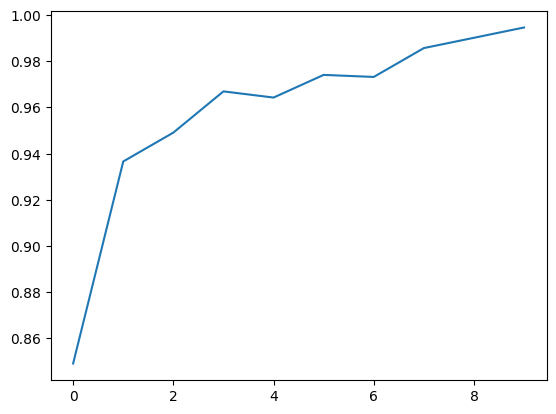

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

Saving the model

In [28]:
model.save("model/")